<a href="https://colab.research.google.com/github/Lisa-Maruta/Sea-Level-Predictor/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload 'epa-sea-level.csv'


Saving epa-sea-level.csv to epa-sea-level (1).csv
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


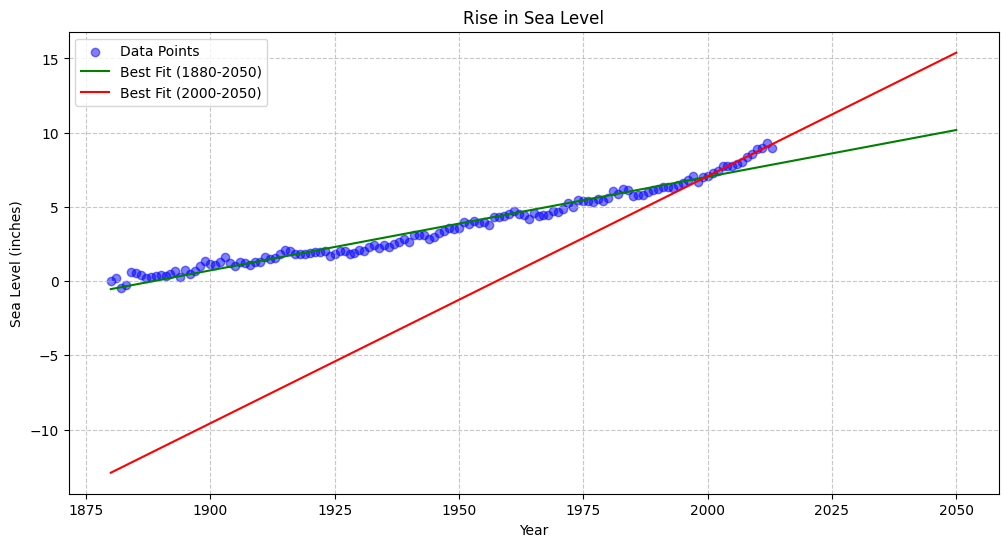

Plot saved as 'sea_level_rise.png'.
Download the plot using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [2]:
!pip install pandas matplotlib scipy

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from google.colab import files

print("Please upload 'epa-sea-level.csv'")
uploaded = files.upload()

data = pd.read_csv('epa-sea-level.csv')

print(data.head())

def plot_sea_level(data):
    """Plot scatter plot and lines of best fit for the sea level data."""
    # Scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(data['Year'], data['CSIRO Adjusted Sea Level'], label='Data Points', color='blue', alpha=0.5)

    slope, intercept, _, _, _ = linregress(data['Year'], data['CSIRO Adjusted Sea Level'])
    years_extended = range(1880, 2051)
    plt.plot(years_extended, [slope * year + intercept for year in years_extended],
             label='Best Fit (1880-2050)', color='green')

    # Line of best fit
    data_recent = data[data['Year'] >= 2000]
    slope_recent, intercept_recent, _, _, _ = linregress(data_recent['Year'], data_recent['CSIRO Adjusted Sea Level'])
    plt.plot(years_extended, [slope_recent * year + intercept_recent for year in years_extended],
             label='Best Fit (2000-2050)', color='red')

    # labels
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

    plt.savefig('sea_level_rise.png')
    print("Plot saved as 'sea_level_rise.png'.")

plot_sea_level(data)

print("Download the plot using the link below:")
files.download('sea_level_rise.png')
